In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Reading the data

In [39]:
data = pd.read_csv('train_data.csv')
data.shape

(792, 17)

# Decision Tree with default values

In [75]:
cols = ['PassengerId', 'Sex', 'Age', 'Fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Family_size', 'Title_1', 'Title_2', 'Title_3',
       'Title_4', 'Emb_1', 'Emb_2', 'Emb_3']
y = data['Survived']
x = data[cols]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

precision = precision_score(y_pred, y_test)
print('precision score: {0:0.2f}'.format(precision))

recall = recall_score(y_pred, y_test)
print('recall score: {0:0.2f}'.format(recall))

Accuracy: 0.7647058823529411
precision score: 0.67
recall score: 0.73


# Visualizing the Decision Tree

In [10]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

# Tuning Decision Tree
    

 ###### The hyperparanmeter used to tune the decision tree is min_samples_leaf. This  specifies the minimum number of samples, every leaf node should contain in our model. This helps in preventing over-fitting particulary when many features are taken into considersation for splitting out samples.
 
 ###### There right number is always chosen by trial and error. Algthough, we should be careful to not choose too high a number as it may result in underfitting. When I tried with multiple values, Anything between 10 and 20 (in particular 10) increased the accuracy by almost 4% by an average. 

In [76]:
clf1 = DecisionTreeClassifier(min_samples_leaf = 10)
clf1 = clf1.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

precision = precision_score(y_pred1, y_test)
print('precision score: {0:0.2f}'.format(precision))

recall = recall_score(y_pred1, y_test)
print('recall score: {0:0.2f}'.format(recall))

Accuracy: 0.7899159663865546
precision score: 0.59
recall score: 0.84


# Visualizing Decision Tree

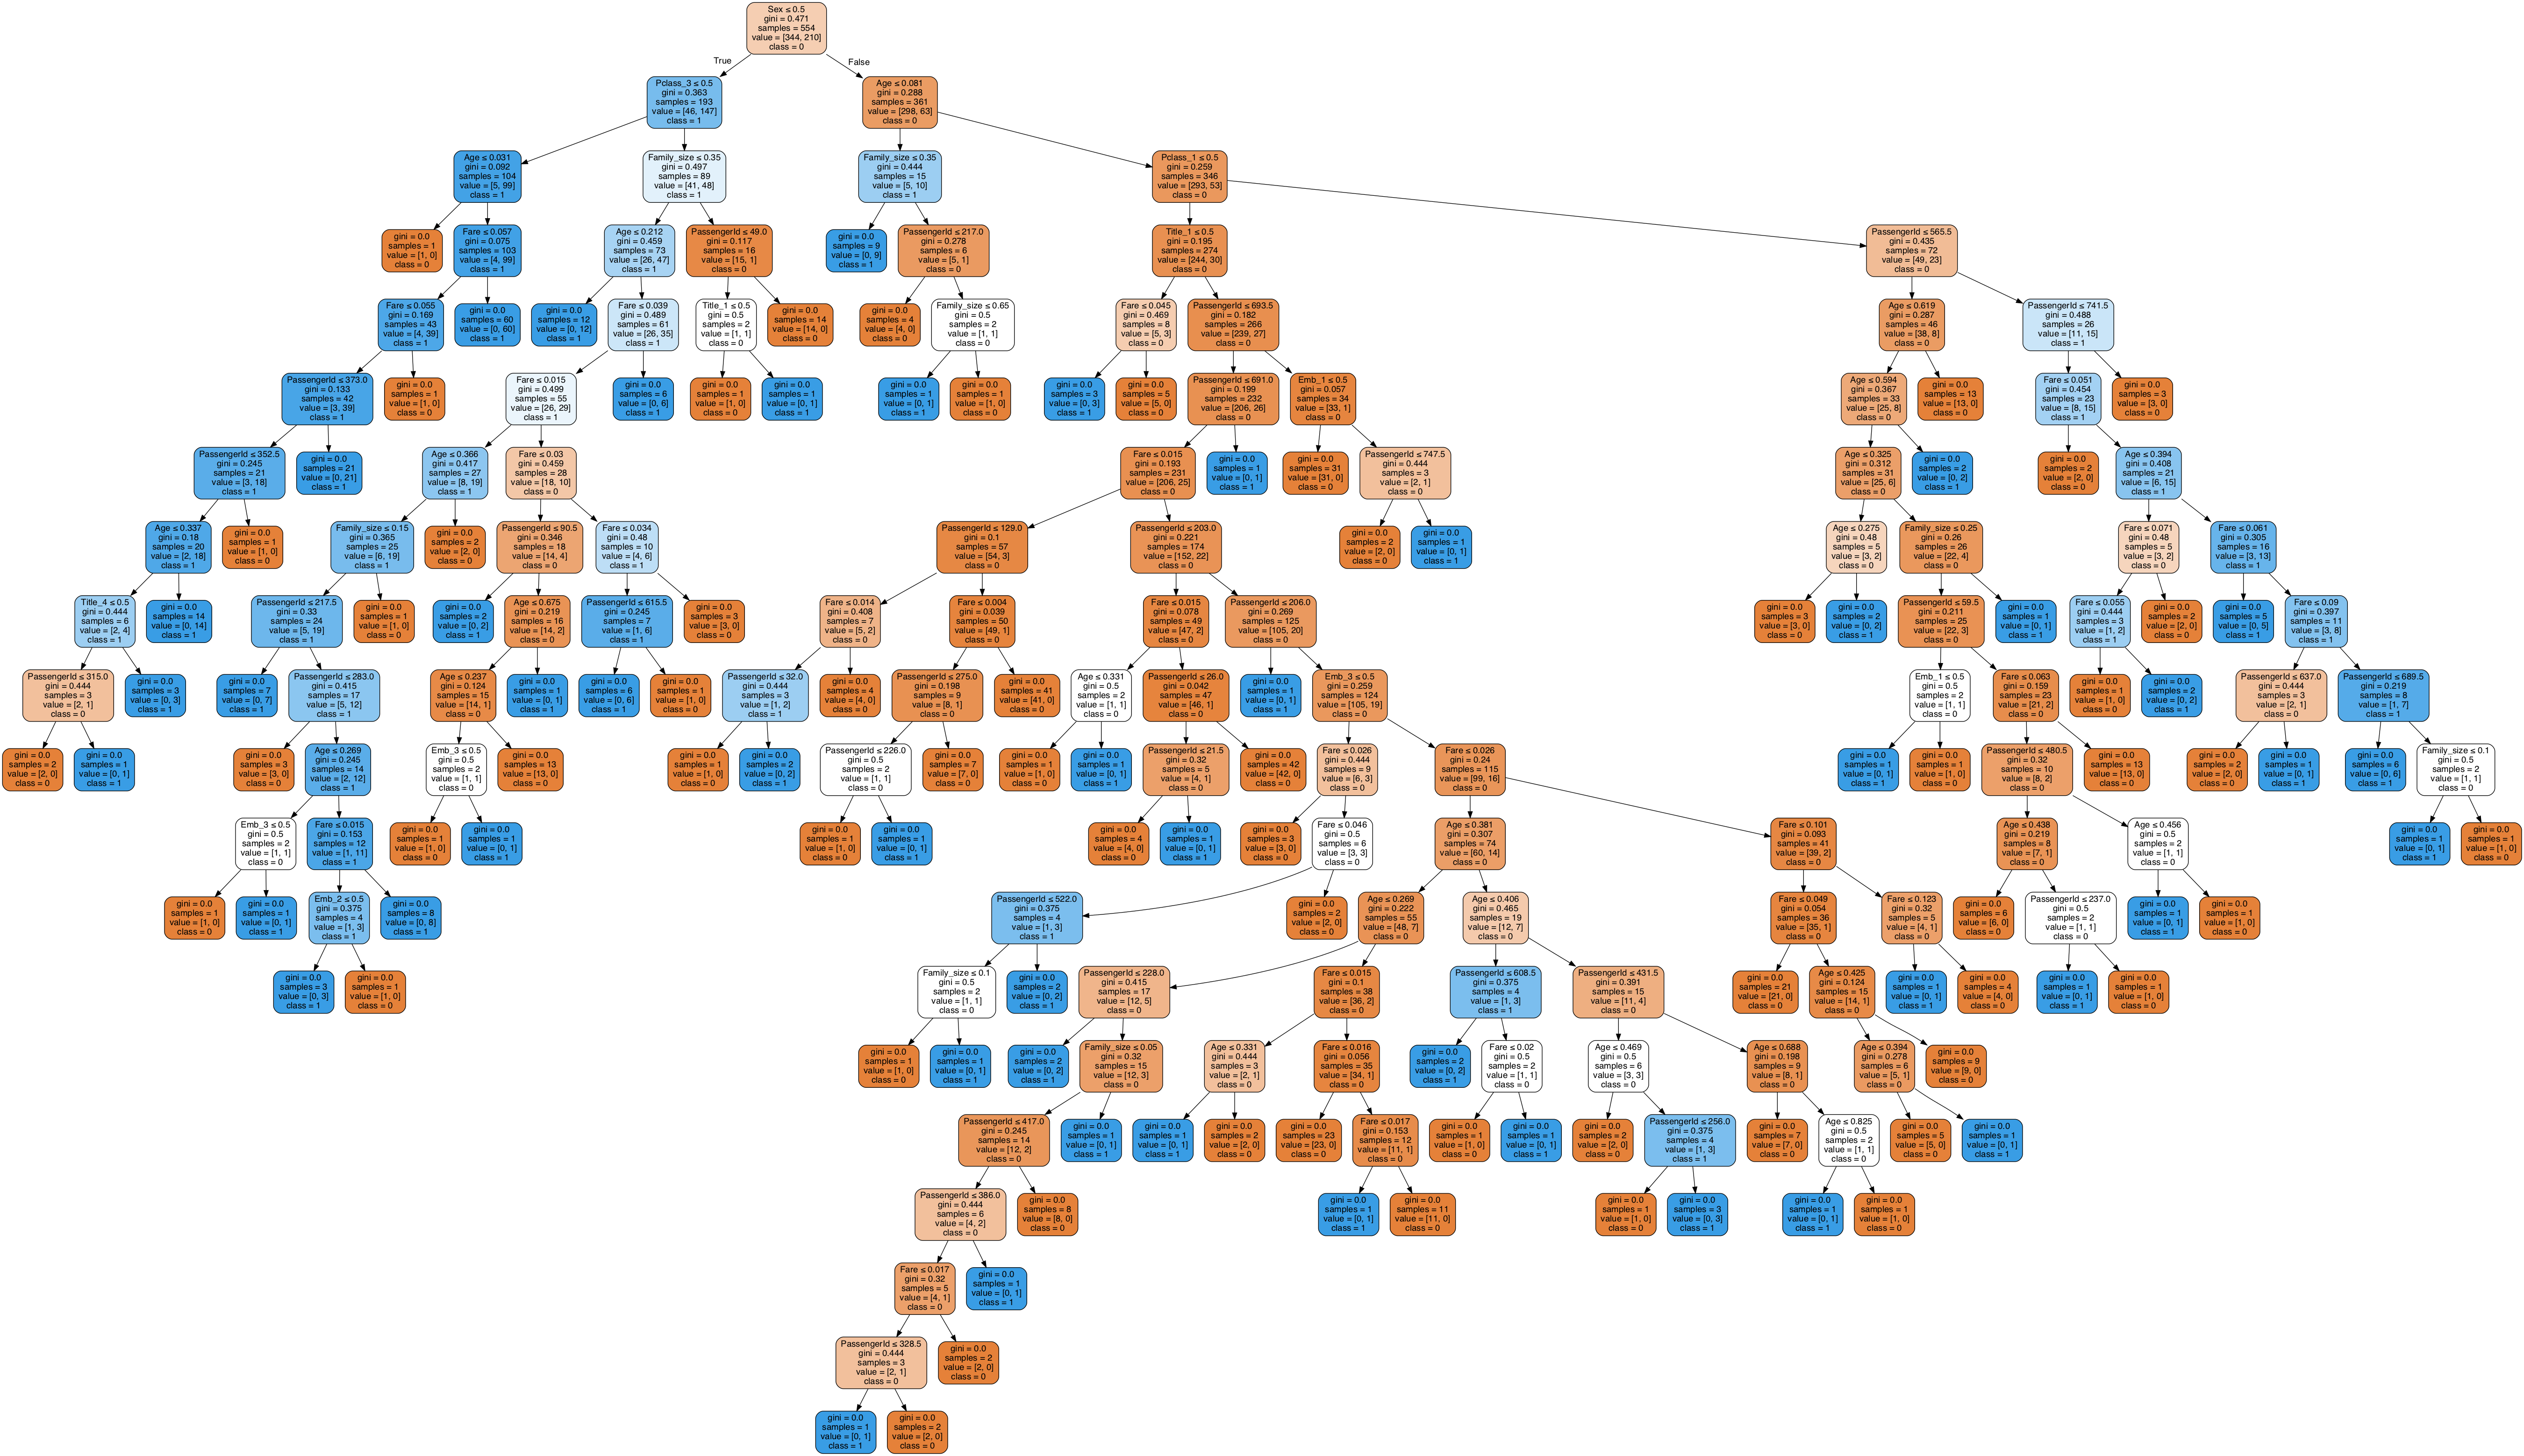

In [53]:
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

#### When Decision Tree is tuned using a hyper parameter, we can see that efficiency and recall score increases while the value of presicion decreases. This is happens due to the noise in the dataset. We can never increase both presicion and recall. If one increases, the other will decrease. Now, precision - recall tradeoff depends on the end goal and purpose of the data analysis. We cannot decide which one is better without context.